In [12]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

### Question about the data
- What is the company about, where does the data come from -> (sales in online store)
- Is the Id and the customer_id the same?
- in the columns [days_since_last_login, avg_time_spent, points_in_wallet, avg_frequency_login_days] have negative values, is that correct?
- What is security_no,preferred_offer_types, avg_transaction_value, offer_application_preference 
- when we say medium_of_operation does it mean which platform the customer is using? -> the platform the customer is using
- What does the Error mean in avg_frequency_login_days and what does the column mean?

#### Displaying the top 5 rows of the data

In [39]:
df = pd.read_csv('churn_dataset_train.csv')
df.head()

,ID,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn
0,1644,fffe43004900440033003200390032003400,Dusty Dunneback,30,F,URPJZ5B,Village,No Membership,09/08/2017,Yes,...,118.390000,10579.56,24,610.360000,Yes,No,No,Not Applicable,Poor Product Quality,1
1,8516,fffe43004900440036003200310038003600,Dorine Vanduyn,55,M,O0IWUYW,Village,Silver Membership,09/02/2016,No,...,179.420000,22963.05,27,694.650000,Yes,No,No,Not Applicable,Poor Product Quality,0
2,15564,fffe430049004400350032003200,Christene Pulver,47,M,2R0EFA2,City,Basic Membership,11/06/2017,Yes,...,42.230000,32604.41,Error,520.620000,Yes,No,No,Not Applicable,Poor Product Quality,1
3,22211,fffe43004900440032003200380034003600,Brendan Enciso,18,M,XF0YGUT,Town,Gold Membership,09/02/2016,No,...,-1035.833706,48913.61,27,1150.093442,Yes,No,No,Not Applicable,Too many ads,0
4,32088,fffe43004900440035003600320032003100,Lizette Lemons,28,F,V5YZC2N,City,No Membership,16/07/2017,Yes,...,449.770000,20010.02,14,653.040000,Yes,Yes,Yes,No Information Available,No reason specified,0


In [ ]:
len(df.ID.unique()) , len(df.customer_id.unique()), len(df.customer_id.unique()) == len(df.ID.unique())

(24784, 24784, True)

In [ ]:
df.customer_id.unique()), len(df.customer_id.unique()) == len(df.ID.unique())

#### Showing the data types of the columns and the number of non null values

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24784 entries, 0 to 24783
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            24784 non-null  int64  
 1   customer_id                   24784 non-null  object 
 2   Name                          24784 non-null  object 
 3   age                           24784 non-null  int64  
 4   gender                        24784 non-null  object 
 5   security_no                   24784 non-null  object 
 6   region_category               21087 non-null  object 
 7   membership_category           24784 non-null  object 
 8   joining_date                  24784 non-null  object 
 9   joined_through_referral       21158 non-null  object 
 10  referral_id                   12787 non-null  object 
 11  preferred_offer_types         24576 non-null  object 
 12  medium_of_operation           21156 non-null  object 
 13  i

* For the number columns, we see the distribution of the data, mean std, min, max, 25%, 50%, 75%
* It also show the count of the non null values

In [16]:
df.describe()


,ID,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn
count,24784.000000,24784.000000,24784.000000,24784.000000,24784.000000,22497.000000,24784.000000
mean,18467.497014,36.986967,-42.462314,241.974449,29307.237880,686.287574,0.265655
std,10660.308320,15.860701,229.834676,395.333687,19436.878248,193.175055,0.441690
min,0.000000,10.000000,-999.000000,-2281.236526,800.460000,-549.357498,0.000000
25%,9262.750000,23.000000,8.000000,60.165000,14194.192500,616.410000,0.000000
50%,18495.500000,37.000000,12.000000,161.390000,27612.555000,696.920000,0.000000
75%,27676.250000,51.000000,16.000000,354.725000,40862.025000,763.090000,1.000000
max,36989.000000,64.000000,26.000000,3040.410000,99914.050000,1816.933696,1.000000


* For the feedback columns, we see the number of unique values, the top value and the frequency of that value

In [17]:
df.feedback.value_counts()

feedback
Poor Product Quality        4309
Too many ads                4238
Poor Customer Service       4210
Poor Website                4206
No reason specified         4128
User Friendly Website        940
Reasonable Price             937
Products always in Stock     934
Quality Customer Care        882
Name: count, dtype: int64

* For the columns which have missing values show the number of missing values

In [18]:
df.isnull().sum()[df.isnull().sum() > 0]

region_category             3697
joined_through_referral     3626
referral_id                11997
preferred_offer_types        208
medium_of_operation         3628
points_in_wallet            2287
dtype: int64

In [19]:
df.offer_application_preference

0         No
1         No
2         No
3         No
4        Yes
        ... 
24779     No
24780     No
24781    Yes
24782    Yes
24783    Yes
Name: offer_application_preference, Length: 24784, dtype: object

In [20]:
df.columns

Index(['ID', 'customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn'],
      dtype='object')

#### Data transformation

In [ ]:
# change the columns to be 1 if the user Yes and 0 if the user No
df['is_male'] = df.gender.apply(lambda x: 1 if x == 'M' else 0)
df.joined_through_referral = df.joined_through_referral.apply(lambda x: 1 if x == 'Yes' else 0)
df['used_special_discount'] = df['used_special_discount'].apply(lambda x: 1 if x == 'Yes' else 0)
df['offer_application_preference'] = df['offer_application_preference'].apply(lambda x: 1 if x == 'Yes' else 0)
df['past_complaint'] = df['past_complaint'].apply(lambda x: 1 if x == 'Yes' else 0)


In [50]:
# fill the referral_id rows witch have value 1 on joined_through_referral and no referral_id with referral_id = customer_id
df.loc[(df.joined_through_referral == 1) & (df.referral_id.isnull()), 'referral_id'] = df.loc[(df.joined_through_referral == 1) & (df.referral_id.isnull()), 'customer_id']

In [22]:
value_counts = df.region_category.value_counts()
value_counts = value_counts.reset_index()
value_counts.columns = ['region_category', 'count']
fig = px.pie(value_counts, 
             names='region_category', 
             values='count', 
             title='Region Category Distribution',
             )
fig.update_traces(textposition='inside', textinfo='percent+label',textfont=dict(size=18) )
fig.update_layout(title_x=0.5)
fig.show()


In [23]:
# Group by region and internet option
grouped = df.groupby(['region_category', 'internet_option']).size().reset_index(name='count')

# Create the bar chart
fig = px.bar(grouped,
             x='region_category',
             y='count',
             color='internet_option',  # 🎨 Color by internet option
             title='Count by Region and Internet Option',
             labels={
                 'region_category': 'Region',
                 'internet_option': 'Internet Option',
                 'count': 'Count'
             },
             barmode='stack')  # or 'group' if you want side-by-side bars

fig.show()


In [24]:
# Group by both membership and region categories
grouped = df.groupby(['membership_category', 'region_category']).size().reset_index(name='count')

# Create bar chart with hue (color) by region_category
fig = px.bar(grouped,
             x='membership_category',
             y='count',
             color='region_category',  # 🎨 Hue here
             title='Membership Category Distribution by Region',
             labels={
                 'membership_category': 'Membership Category',
                 'count': 'Count',
                 'region_category': 'Region Category'
             },
             barmode='stack')  

fig.show()


In [25]:
df.age.describe()

count    24784.000000
mean        36.986967
std         15.860701
min         10.000000
25%         23.000000
50%         37.000000
75%         51.000000
max         64.000000
Name: age, dtype: float64

In [26]:
# age distribution
fig = px.histogram(df, x='age', nbins=26, title='Age Distribution', color='gender')
fig.update_traces(marker=dict(line=dict(width=1, color='black')))
fig.update_layout(title_x=0.5)
fig.show()

In [27]:
df.referral_id.value_counts()
# # Get top 15 referral_id value counts
# top_referrals = df.referral_id.value_counts().nlargest(30).reset_index()
# top_referrals.columns = ['referral_id', 'count']

# # Create bar chart
# fig = px.bar(top_referrals,
#              x='referral_id',
#              y='count',
#              title='Top 15 Referral IDs by Count',
#              labels={'referral_id': 'Referral ID', 'count': 'Count'})

# fig.show()

referral_id
CID3979     10
CID43705     9
CID49598     8
CID49601     8
CID62015     8
            ..
CID60327     1
CID19563     1
CID30663     1
CID35706     1
CID31329     1
Name: count, Length: 8738, dtype: int64

- We show in this section couple of anomalies in the data
- There are clients which join through referral but they have no referral id and there are clients which have referral id but they didn't join through referral
- The amount of clients which does not have a referral id is $968$
- The amount of clients which have a referral id but they didn't join through referral is $3250$

In [48]:
df[(df.joined_through_referral == 1) & (df.referral_id.isnull())][['joined_through_referral', 'referral_id']]


,joined_through_referral,referral_id


In [49]:
df[(df.referral_id.notnull()) & (df.joined_through_referral == 0)][['joined_through_referral', 'referral_id']]


,joined_through_referral,referral_id


In [44]:
import pandas as pd
import plotly.express as px

# Select relevant columns
cols = ['age', 'days_since_last_login', 'avg_time_spent',
        'avg_transaction_value', 'points_in_wallet',]

# Calculate and round correlation
correlation = df[cols].corr().round(1)

# Plot heatmap
fig = px.imshow(correlation,
                text_auto=True,
                color_continuous_scale='RdBu',
                title='Correlation Heatmap (Rounded to 0.1)')

fig.show()


In [31]:
df.internet_option.value_counts()

internet_option
Wi-Fi          8354
Mobile_Data    8253
Fiber_Optic    8177
Name: count, dtype: int64

In [32]:
import plotly.express as px

selected_cols = ['days_since_last_login', 'avg_time_spent', 'churn']
corr = df[selected_cols].corr().round(1)

fig = px.imshow(corr,
                text_auto=True,
                color_continuous_scale='RdBu',
                title='Correlation: Login Days, Time Spent & Churn')

fig.show()


In [33]:
df.complaint_status.value_counts()

complaint_status
Not Applicable              12513
Unsolved                     3120
Solved                       3081
Solved in Follow-up          3044
No Information Available     3026
Name: count, dtype: int64

In [ ]:
# # df.preferred_offer_types.value_counts()
# # graph of preferred_offer_types with membership_category and region_category
# df.medium_of_operation.value_counts()
# create a histogram of points in wallet # instead of count show percent
fig = px.histogram(df, x='points_in_wallet', color='membership_category' ,nbins=30, title='Points in Wallet Distribution')
fig.update_traces(marker=dict(line=dict(width=1, color='black')))
fig.update_layout(title_x=0.5)
fig.show()


In [47]:
# count how many rows have MISSING value in one of the columns
df.isnull().sum()[df.isnull().sum() > 0]

region_category             3697
joined_through_referral     3626
referral_id                11997
preferred_offer_types        208
medium_of_operation         3628
points_in_wallet            2287
dtype: int64

Accuracy: 0.8137986685495259
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.76      0.86      3647
           1       0.59      0.95      0.73      1310

    accuracy                           0.81      4957
   macro avg       0.78      0.86      0.79      4957
weighted avg       0.88      0.81      0.82      4957

Confusion Matrix:
 [[2786  861]
 [  62 1248]]


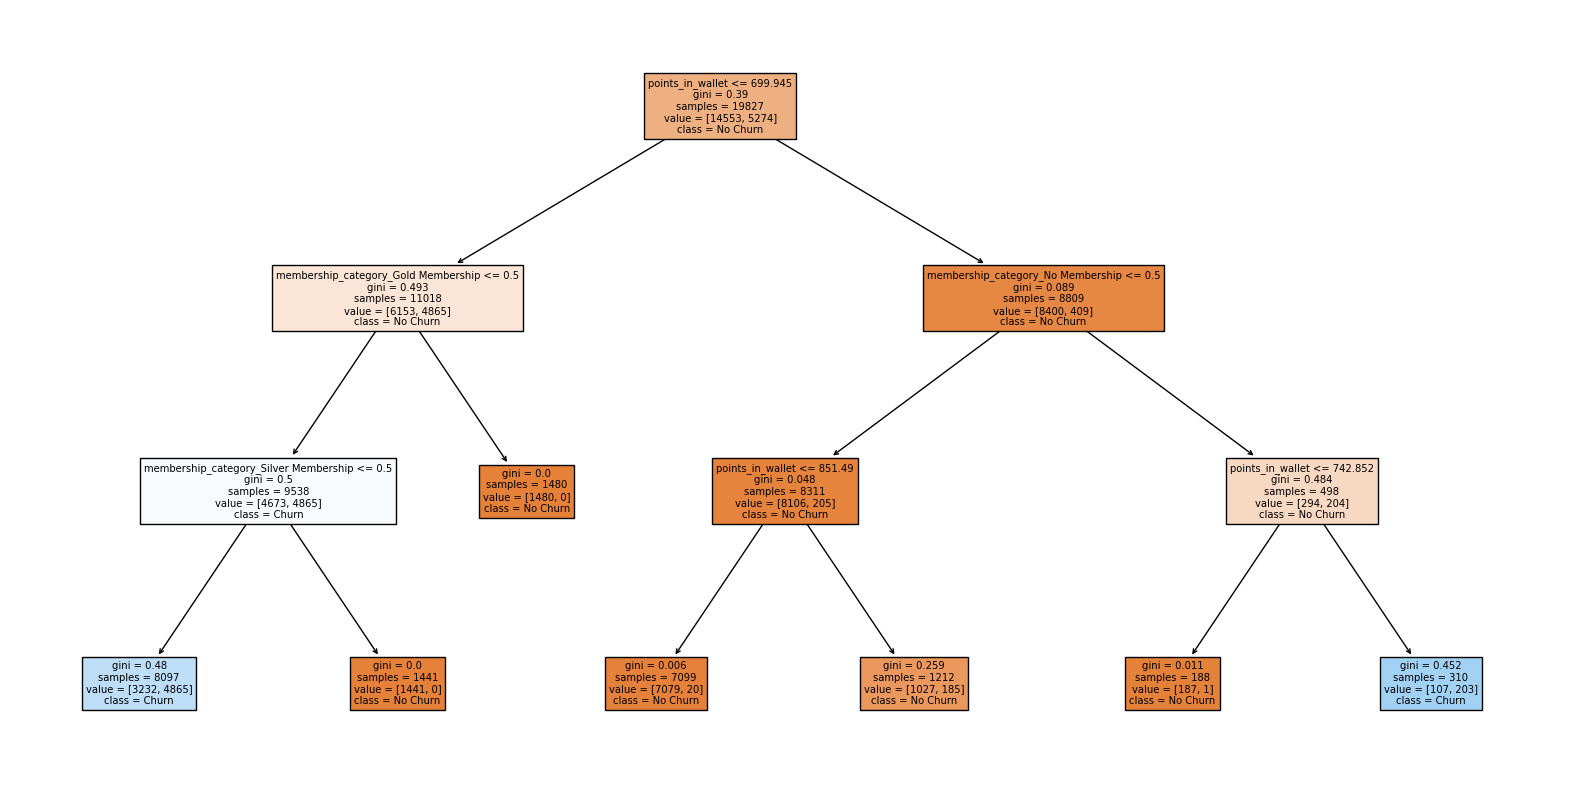

In [38]:
# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 2. Load the dataset
df = pd.read_csv('churn_dataset_train.csv')  # Adjust path if needed

# 3. Preprocessing
# Drop columns that are IDs or not useful for prediction
df = df.drop(['ID', 'customer_id', 'Name', 'security_no', 'referral_id'], axis=1)
# Handle missing values
df = df.fillna(0)  # Simple handling; you can improve based on deeper analysis
df['membership_category'] = df['membership_category'].astype('category')

# Encode categorical variables into dummy/one-hot columns
df = pd.get_dummies(df, drop_first=True)

# 4. Define features and target
X = df.drop('churn', axis=1)
y = df['churn']

# 5. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Create and train the Decision Tree (CART) with GINI
model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3)
model.fit(X_train, y_train)

# 7. Predict and evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 8. Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["No Churn", "Churn"])
plt.show()
